### Text Processing

In [1]:
import nltk
from nltk.corpus import brown
from nltk.corpus import stopwords
import re
import string

# nltk.download('brown')
# nltk.download('stopwords')

sentences = brown.sents(categories=['news'])

# print(string.punctuation)
# print(re.escape(string.punctuation))

stop_words = set(stopwords.words('english'))
# print(list(stop_words)[:10])  # Show a few stop words for verification

# Prepare regex for character filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))

# Process each sentence in sentences
processed_sentences = []
for sublist in sentences:
    # convert to lower case and remove punctuation
    tokens = [re_punc.sub('', w.lower()) for w in sublist]
    # remove non-alphabetic tokens and filter out stop words
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    processed_sentences.append(words)

# Let's print the first 5 processed sentences
for i in range(5):
    print(processed_sentences[i])

['fulton', 'county', 'grand', 'jury', 'said', 'friday', 'investigation', 'atlantas', 'recent', 'primary', 'election', 'produced', 'evidence', 'irregularities', 'took', 'place']
['jury', 'said', 'termend', 'presentments', 'city', 'executive', 'committee', 'overall', 'charge', 'election', 'deserves', 'praise', 'thanks', 'city', 'atlanta', 'manner', 'election', 'conducted']
['septemberoctober', 'term', 'jury', 'charged', 'fulton', 'superior', 'court', 'judge', 'durwood', 'pye', 'investigate', 'reports', 'possible', 'irregularities', 'hardfought', 'primary', 'mayornominate', 'ivan', 'allen', 'jr']
['relative', 'handful', 'reports', 'received', 'jury', 'said', 'considering', 'widespread', 'interest', 'election', 'number', 'voters', 'size', 'city']
['jury', 'said', 'find', 'many', 'georgias', 'registration', 'election', 'laws', 'outmoded', 'inadequate', 'often', 'ambiguous']


### Fit Embedding Model

In [2]:
from gensim.models import Word2Vec

In [3]:
# train model
model = Word2Vec(processed_sentences, min_count=5, sg=0)

In [4]:
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index)
print(words)

Word2Vec<vocab=2359, vector_size=100, alpha=0.025>
['said', 'mrs', 'would', 'new', 'one', 'last', 'two', 'mr', 'first', 'state', 'year', 'president', 'home', 'also', 'years', 'made', 'time', 'three', 'house', 'week', 'city', 'may', 'school', 'could', 'four', 'day', 'members', 'committee', 'man', 'back', 'government', 'us', 'many', 'national', 'states', 'university', 'bill', 'high', 'get', 'american', 'since', 'work', 'kennedy', 'program', 'night', 'john', 'board', 'administration', 'meeting', 'even', 'county', 'per', 'united', 'public', 'tax', 'service', 'white', 'yesterday', 'people', 'today', 'club', 'court', 'monday', 'must', 'told', 'well', 'without', 'sales', 'miss', 'federal', 'company', 'york', 'family', 'good', 'set', 'sunday', 'much', 'game', 'cent', 'texas', 'take', 'car', 'however', 'system', 'dallas', 'washington', 'like', 'men', 'children', 'took', 'way', 'mantle', 'world', 'plan', 'another', 'jury', 'jr', 'long', 'education', 'five', 'got', 'business', 'million', 'local',

In [5]:
# access vector for one word
print('Vector for token "mrs": \nShape:',
      model.wv['mrs'].shape,
      "\nVector:\n",
     model.wv['mrs'])

# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Vector for token "mrs": 
Shape: (100,) 
Vector:
 [-2.6742315e-01  4.6047243e-01  7.5615562e-02  1.0956578e-01
  2.8529525e-02 -5.6462044e-01  8.6970486e-02  6.8323630e-01
 -1.6154134e-01 -1.5939178e-01 -1.5072627e-01 -6.5148979e-01
 -4.0643696e-02  1.5692472e-01  2.0483356e-02 -3.5394162e-01
 -1.1467237e-02 -3.5646397e-01 -9.3614735e-02 -5.8684146e-01
  1.7664839e-01  2.0011325e-01  2.1689956e-01 -1.8187831e-01
  5.2611876e-02 -9.1954410e-02 -2.2975585e-01 -2.5924283e-01
 -3.9331159e-01 -1.8899160e-02  3.9652985e-01  6.8975896e-02
 -4.5302454e-02 -1.3010719e-01 -1.0940367e-01  2.6225346e-01
  2.1342482e-01 -3.9446101e-01 -9.5695414e-02 -5.4350299e-01
  5.3370304e-02 -3.9927024e-01 -2.4324930e-01  3.8908672e-02
  2.4418309e-01 -1.5766604e-01 -3.0589741e-01  2.2372666e-03
  4.5260590e-02  3.1597933e-01  7.0075877e-02 -2.0352750e-01
 -2.8984961e-01  8.2468182e-02 -1.3907251e-01  1.7316841e-01
  3.5488108e-01 -6.8350226e-02 -1.8231264e-01  1.2608367e-01
  1.8102564e-01  9.2515603e-02 -9.89

In [6]:
%matplotlib inline
from sklearn.decomposition import PCA
from matplotlib import pyplot

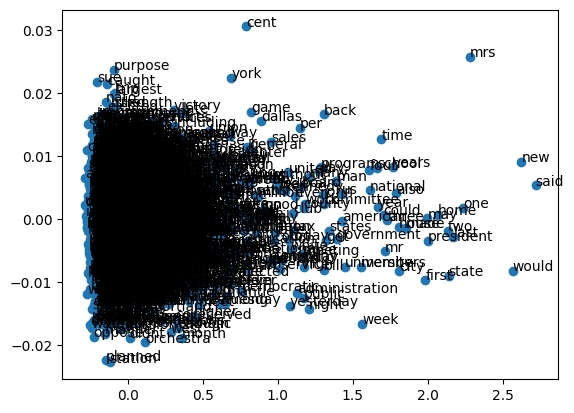

In [7]:
# fit a 2d PCA model to the vectors
X = model.wv[model.wv.key_to_index]

pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

### Bias Analysis

In [16]:
# Find nearest words to 'man' and 'woman'
# if 'man' and 'woman' are not in vocabulary
if 'man' not in model.wv.key_to_index:
    man_alternatives = model.wv.similar_by_word('male', topn=10)
    print("Alternatives for 'man':", man_alternatives)

if 'woman' not in model.wv.key_to_index:
    woman_alternatives = model.wv.similar_by_word('female', topn=10)
    print("Alternatives for 'woman':", woman_alternatives)

In [28]:
model.wv.similar_by_word('man', topn=20)

[('two', 0.9993195533752441),
 ('said', 0.9993067383766174),
 ('state', 0.9991616010665894),
 ('would', 0.9990984201431274),
 ('may', 0.9990691542625427),
 ('time', 0.9990465044975281),
 ('members', 0.999039351940155),
 ('new', 0.9990336894989014),
 ('one', 0.998980700969696),
 ('week', 0.998975932598114),
 ('also', 0.9989625215530396),
 ('mr', 0.9989424347877502),
 ('government', 0.9989369511604309),
 ('get', 0.9989058375358582),
 ('home', 0.9989030361175537),
 ('national', 0.9988840222358704),
 ('city', 0.9988787174224854),
 ('could', 0.9988781809806824),
 ('years', 0.9988723397254944),
 ('first', 0.998871922492981)]

In [29]:
model.wv.similar_by_word('woman', topn=20)

[('issue', 0.9344399571418762),
 ('individual', 0.9327592253684998),
 ('months', 0.9327294230461121),
 ('early', 0.9323750138282776),
 ('case', 0.9319952726364136),
 ('junior', 0.9317395091056824),
 ('sales', 0.9312780499458313),
 ('second', 0.9311451315879822),
 ('george', 0.9311008453369141),
 ('great', 0.9309670925140381),
 ('done', 0.9308025240898132),
 ('says', 0.9304221868515015),
 ('team', 0.9303667545318604),
 ('around', 0.9303524494171143),
 ('education', 0.9303311109542847),
 ('movement', 0.9302734732627869),
 ('right', 0.9302588105201721),
 ('hours', 0.9302473664283752),
 ('end', 0.9302438497543335),
 ('federal', 0.9301910400390625)]

In [30]:
model.wv.similar_by_word('guy', topn=20)

[('call', 0.9402808547019958),
 ('working', 0.9368062019348145),
 ('price', 0.9364342093467712),
 ('sales', 0.9363062977790833),
 ('next', 0.9361577033996582),
 ('director', 0.9360692501068115),
 ('measure', 0.9356791377067566),
 ('part', 0.9356184601783752),
 ('expected', 0.9354745149612427),
 ('general', 0.935329258441925),
 ('room', 0.9352194666862488),
 ('blue', 0.935197114944458),
 ('final', 0.9351338148117065),
 ('came', 0.9350554347038269),
 ('attorney', 0.9350538849830627),
 ('junior', 0.9350226521492004),
 ('course', 0.9349557757377625),
 ('several', 0.9346551895141602),
 ('hospital', 0.9344265460968018),
 ('education', 0.9344127774238586)]

In [31]:
model.wv.similar_by_word('girl', topn=20)

[('major', 0.9602393507957458),
 ('march', 0.9601426720619202),
 ('course', 0.9600691795349121),
 ('months', 0.9597417712211609),
 ('e', 0.9595892429351807),
 ('country', 0.9594841003417969),
 ('young', 0.959465503692627),
 ('year', 0.9594645500183105),
 ('full', 0.9593032002449036),
 ('hospital', 0.959225058555603),
 ('got', 0.9592068195343018),
 ('laws', 0.9590954184532166),
 ('military', 0.9590404033660889),
 ('given', 0.959039568901062),
 ('well', 0.9589174389839172),
 ('cent', 0.9588630199432373),
 ('last', 0.9588585495948792),
 ('david', 0.9587951898574829),
 ('sales', 0.958759069442749),
 ('large', 0.9587517976760864)]

In [38]:
model.wv.similar_by_word('mr', topn=20)

[('said', 0.9994485378265381),
 ('president', 0.9993481040000916),
 ('would', 0.9993453621864319),
 ('new', 0.9992825388908386),
 ('week', 0.9992494583129883),
 ('one', 0.999241828918457),
 ('two', 0.9992366433143616),
 ('state', 0.9992178082466125),
 ('years', 0.9992164373397827),
 ('time', 0.999204695224762),
 ('made', 0.9992019534111023),
 ('three', 0.9992009401321411),
 ('city', 0.9991731643676758),
 ('home', 0.9991711378097534),
 ('members', 0.9991559982299805),
 ('could', 0.9991514682769775),
 ('may', 0.9991328716278076),
 ('year', 0.9991195201873779),
 ('also', 0.999118983745575),
 ('university', 0.9991070032119751)]

In [39]:
model.wv.similar_by_word('mrs', topn=20)

[('said', 0.9993036389350891),
 ('new', 0.9992527961730957),
 ('would', 0.9991803765296936),
 ('also', 0.999173641204834),
 ('years', 0.9991721510887146),
 ('president', 0.9991370439529419),
 ('state', 0.9991210699081421),
 ('one', 0.9991090893745422),
 ('mr', 0.9991005063056946),
 ('made', 0.9990918636322021),
 ('home', 0.9990771412849426),
 ('three', 0.9990651607513428),
 ('city', 0.9990545511245728),
 ('could', 0.9990524649620056),
 ('may', 0.9990522265434265),
 ('first', 0.9990208148956299),
 ('house', 0.9989945292472839),
 ('committee', 0.9989919066429138),
 ('two', 0.9989895224571228),
 ('time', 0.9989653825759888)]

In [41]:
model.wv.similar_by_word('mrs', topn=20)

[('said', 0.9993036389350891),
 ('new', 0.9992527961730957),
 ('would', 0.9991803765296936),
 ('also', 0.999173641204834),
 ('years', 0.9991721510887146),
 ('president', 0.9991370439529419),
 ('state', 0.9991210699081421),
 ('one', 0.9991090893745422),
 ('mr', 0.9991005063056946),
 ('made', 0.9990918636322021),
 ('home', 0.9990771412849426),
 ('three', 0.9990651607513428),
 ('city', 0.9990545511245728),
 ('could', 0.9990524649620056),
 ('may', 0.9990522265434265),
 ('first', 0.9990208148956299),
 ('house', 0.9989945292472839),
 ('committee', 0.9989919066429138),
 ('two', 0.9989895224571228),
 ('time', 0.9989653825759888)]

# Gender Bias Analysis

## Reproduce

### Prerequisites
To reproduce the findings, ensure you have the following prerequisites:
- A corpus of text that is representative of natural language usage.
- A word embedding model library, such as Gensim in Python.
- Python environment with necessary libraries installed (numpy, sklearn, etc.).

### Steps
1. Load your corpus of text into the Python environment.
2. Train a word embedding model using the corpus. Example using Gensim:
   ```python
   from gensim.models import Word2Vec
   sentences = // your text corpus as a list of tokenized sentences //
   model = Word2Vec(sentences, vector_size=100, min_count=5, sg=0)
   ```
3. Perform a similarity search for the target words ('guy', 'woman', 'mrs', etc.):
   ```python
   similar_words = model.wv.most_similar('target_word', topn=20)
   ```
4. Record the top 20 words and their similarity scores.

### Analysis
- Compare the list of similar words for male-associated and female-associated words.
- Observe the types of roles, attributes, and contexts associated with each gender.

## Bias Report

### Observations of Potential Gender Bias

1. ```'guy':```
   - Professions linked with 'guy': 'director', 'general', 'attorney' suggest traditional male roles.
   - To confirm bias, compare with professions linked to 'woman' or 'girl'.

2. ```'woman':```
   - 'issue' as a top similar word might imply negative connotations associated with women.

3. ```'mrs' and 'mr':```
   - A closer relationship of 'mrs' with domestic terms versus 'mr' may reflect traditional domestic gender roles.

4. ```'woman' and 'junior':```
   - If 'junior' is associated with 'woman' but not 'man', it may indicate a bias suggesting women are often in subordinate roles.

5. ```'guy' and 'working':```
   - A strong correlation might perpetuate the stereotype of men being primarily valued for their work.

### Conclusion
While the observations above highlight potential areas of bias, they should be contextualized within the broader dataset. It is crucial to consider societal norms and historical data representations that could contribute to these biases. To make definitive claims of bias, further statistical analysis and comparisons with control terms are necessary.